In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

data = pd.read_table('data/honiometr.dat')
data

,Angle,R
0,-2.6,2.3500
1,0.0,2.4000
2,5.0,2.2700
3,10.0,1.9700
4,15.0,1.5500
5,20.0,1.2500
6,25.0,0.9850
7,30.0,0.7830
8,35.0,0.6620
9,40.0,0.5480


In [104]:
plt.plot(list(data['Angle']), list(data['R']))

KeyError: 'Angle'

In [2]:
angle = list(data['Angle'])
R = [x/99.57 for x in data['R']]

def interpolate_R(x):
    xl = int(x/5)*5 
    xr = int(x/5)*5 +5
    if (x < 0):
        xl = -2.6
        xr = 0
        
    i = angle.index(xl)
    return R[i] + (float(R[i+1])-float(R[i]))/(xr-xl)*(x-xl)




def integrate_angels(x1, x2):
    if(x2 < x1):
        return 0
    
    xl = int(x1/5)*5 +5
    i_1 = angle.index(xl)
    xr = int(x2/5)*5
    i_2 = angle.index(xr)
    
    if xr - xl < 0:
        return (interpolate_R(x2) + interpolate_R(x1))/2*(x2-x1)
    
    integral = (interpolate_R(xl)+interpolate_R(x1))/2*(xl-x1)
    
    i = 0
    while(xl + i*5 - xr < - 0.00001):
        integral += (interpolate_R(xl+i*5)+interpolate_R(xl+i*5+5))/2*5
        i += 1
        
    integral += (interpolate_R(xr)+interpolate_R(x2))/2*(x2-xr)
    
    return integral


integrate_angels(-2.6, 169.9999)

1.0000345927493322

In [3]:
from math import *

D_up = 13.5
D_down = 12.8
L = 100

def theta1(d):
    return atan(D_up/(2*(L + d)))*180/np.pi

def theta2(d):
    if d  < 0.0001:
        return 90
    return atan(D_down/(2*d))*180/np.pi


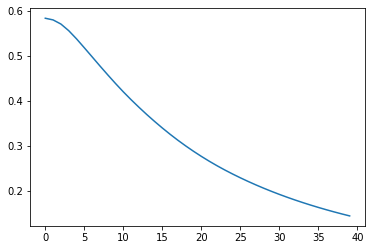

In [4]:
d = [i for i in range(40)]
U = [integrate_angels(theta1(i), theta2(i)) for i in range(40)]

plt.plot(d, U)

# Верхняя сфера готова

In [5]:
def theta1_d(d):
    if d  < 0.0001:
        return 90
    return 180 - atan(D_up/(2*(d)))*180/np.pi

def theta2_d(d):
    if atan(D_down/(2*(L+d)))*180/np.pi < 9.999:
        return 169.999
    return 180 - atan(D_down/(2*(L+d)))*180/np.pi


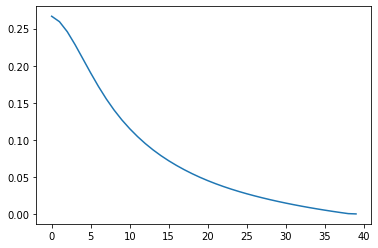

In [6]:
U_bot = [integrate_angels(theta1_d(i), theta2_d(i)) for i in range(40)]

plt.plot(d, U_bot)

# Нижняя сфера готова

In [7]:
text = ""
with open('data/top.dat') as f:
    text = f.read()
    

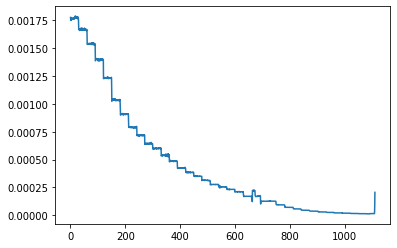

In [8]:
data = pd.read_table('data/top.dat')
plt.plot(data['Time'], data['R'])

In [9]:
tmp = list(data['R'])
tmp_t = list(data['Time'])

means = []
diff = []
time = []
idx = -1
num = 0
cur_time = 0
step_up = True
first = True

for i in range(len(tmp) - 1):
    if(step_up):
        means.append(0)
        idx += 1
        num = 0
        step_up = False
        first = True
        cur_time = tmp_t[i]
    
    if(not first and (tmp_t[i] - cur_time) > 30):
        step_up = True
        time.append(tmp_t[i])
        means[idx] /= num
        if(idx):
            diff.append(means[idx-1] - means[idx])
        continue
    
    means[idx] += tmp[i]
    num += 1
    first = False
time


[30.64400008774828,
 61.017000087769695,
 91.36500008776785,
 121.72600008768497,
 152.1850000877166,
 182.6630000877194,
 213.03400008776225,
 243.41400008776688,
 273.8010000877548,
 304.180000087712,
 334.5510000877548,
 364.86900008772494,
 395.1820000876905,
 425.70700008771377,
 456.24400008772494,
 486.7560000877129,
 517.2730000877054,
 547.555000087712,
 578.0920000877231,
 608.6130000877893,
 638.8910000877222,
 669.1850000877166,
 699.4570000877137,
 729.726000087685,
 760.2520000877557,
 790.6930000877474,
 821.2060000877827,
 851.5010000877081,
 881.8070000876905,
 912.0990000877064,
 942.3860000877175,
 972.6720000876812,
 1003.2030000877565,
 1033.482000087737,
 1063.7590000877387,
 1094.0340000877623]

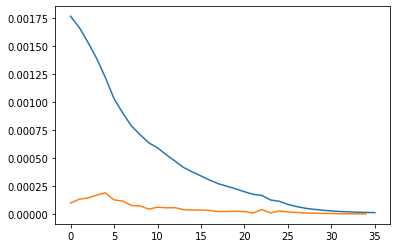

In [10]:
means.pop()
plt.plot(range(len(means)), means, range(len(diff)), diff)

In [11]:
laser = list(pd.read_csv('data/top.csv', delimiter=';', skiprows=14, index_col=False, usecols=[2, 3])['Power (W)'])

def interpolate_power(t):
    if(t > 1111):
        return laser[1111]
    t1 = int(t)
    return laser[t1] + (laser[t1+1] - laser[t1])*(t-t1) 


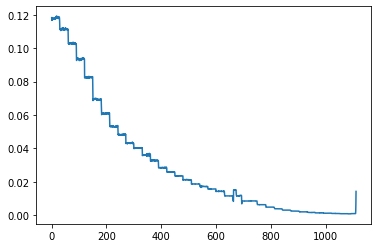

In [12]:
normalised = []
for i in range(len(tmp)):
    normalised.append(tmp[i]/interpolate_power(tmp_t[i]))
    
plt.plot(tmp_t, normalised)

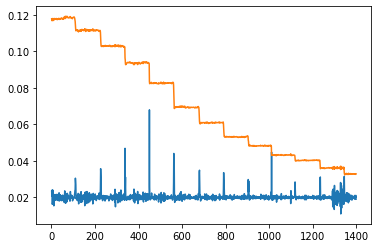

In [13]:
diff = [(normalised[i-1] - normalised[i])*5+0.02 for i in range(1, len(normalised))]
n = np.arange(0, len(diff))
start_point = 1
end_point = 1400

plt.plot(n[start_point:end_point:], diff[start_point-1:end_point-1], n[start_point:end_point:], normalised[start_point:end_point:])

# Плохие измерения!

По графику выше понятно, что эти измерения не получится нормльно обработать при помощи статистики, тк шумы не подчиняются нормальному распределению 

In [14]:
means_n = []
diff_n = []
time_n = []
idx = -1
num = 0
cur_time = 0
step_up = True
first = True

for i in range(len(normalised) - 1):
    if(step_up):
        means_n.append(0)
        if(idx > 0):
            diff_n.append(means_n[idx-1] - means_n[idx])
        idx += 1
        num = 0
        step_up = False
        first = True
        cur_time = tmp_t[i]
    
    if(not first and (tmp_t[i] - cur_time) > 30):
        step_up = True
        time_n.append(tmp_t[i])
        means_n[idx] /= num
        continue
    
    means_n[idx] += normalised[i]
    num += 1
    first = False

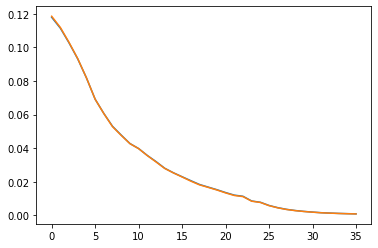

In [15]:
scaled = [x*67 for x in means]

means_n.pop()
plt.plot(range(len(means_n)), means_n, range(len(scaled)), scaled)

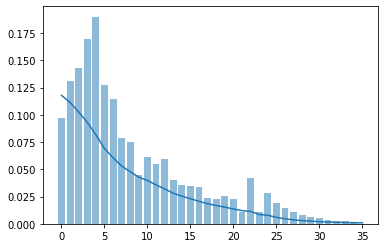

In [16]:
scaled_bars = [x*15 for x in diff_n]
plt.bar(range(len(scaled_bars)), scaled_bars, align='center', alpha = 0.5)
plt.plot(range(len(means_n)), means_n)

In [17]:
len(diff_n), len(means_n)

(35, 36)

([<matplotlib.lines.Line2D at 0x22f8f3263a0>], 36)

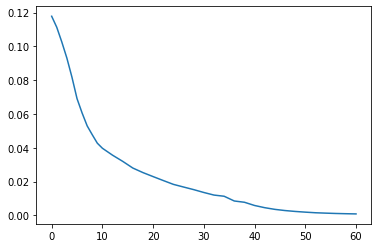

In [18]:
length = [0]
for i in range(1, len(means_n)):
    if i < 11:
        length.append(length[i-1] + 1)
    else: 
        length.append(length[i-1] + 2)

plt.plot(length, means_n), len(means_n)

# Верхняя сфера обработана

## переходим к нижней

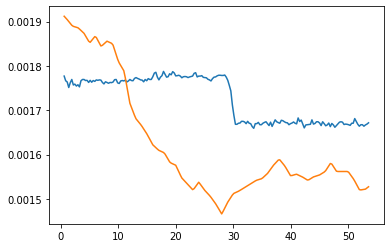

In [19]:
data_bot = pd.read_table('data/bottom.dat')


laser_bot = list(pd.read_csv('data/bottom.csv', delimiter=';', skiprows=14, index_col=False, usecols=[2, 3])['Power (W)'])

def interpolate_laser_bot (i):
    if i > 886:
        return laser_bot[886]
    t1 = int(i)
    return laser_bot[t1] + (laser_bot[t1+1]-laser_bot[t1])*(i-t1)
dots = [(interpolate_laser_bot(data['Time'][i])/10 - 0.00141)*20 for i in range(len(data['Time']))]

plt.plot(data['Time'][0:200:], data['R'][0:200:], data['Time'][0:200:], dots[0:200:])


In [20]:
R = data['R']
Time = data['Time']

R_n = [R[i]/interpolate_laser_bot(Time[i]) for i in range(len(R))]

In [21]:
means_bot = []
diff_bot = []
time_bot = []
idx = -1
num = 0
cur_time = 0
step_up = True
first = True

for i in range(len(R_n) - 1):
    if(step_up):
        means_bot.append(0)
        if(idx > 0):
            diff_bot.append(means_bot[idx-1] - means_bot[idx])
        idx += 1
        num = 0
        step_up = False
        first = True
        cur_time = Time[i]
    
    if(not first and (Time[i] - cur_time) > 30):
        step_up = True
        time_bot.append(Time[i])
        means_bot[idx] /= num
        continue
    
    means_bot[idx] += R_n[i]
    num += 1
    first = False

([<matplotlib.lines.Line2D at 0x22f8f44d6d0>,
 0.11838746487807075)

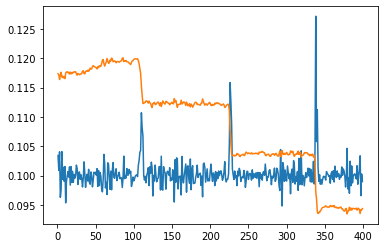

In [22]:
diff_bot = [(R_n[i-1] - R_n[i])*5+0.1 for i in range(1, len(R_n))]
n = np.arange(0, len(diff_bot))
start_point = 1
end_point = 400


plt.plot(n[start_point:end_point:], diff_bot[start_point-1:end_point-1], n[start_point:end_point:], R_n[start_point:end_point:]), means_bot[0]

In [23]:
means_bot[0]+=0.0015

means_bot[0]

0.11988746487807075

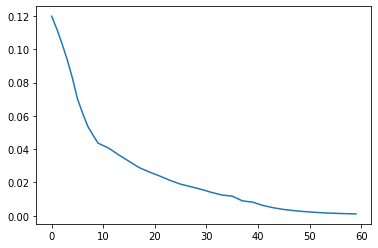

In [73]:
means_bot.pop()
length_bot = [0]
for i in range(1, len(means_bot)):
    if i < 10:
        length_bot.append(length_bot[i-1] + 1)
    else: 
        length_bot.append(length_bot[i-1] + 2)

plt.plot(length_bot, means_bot)

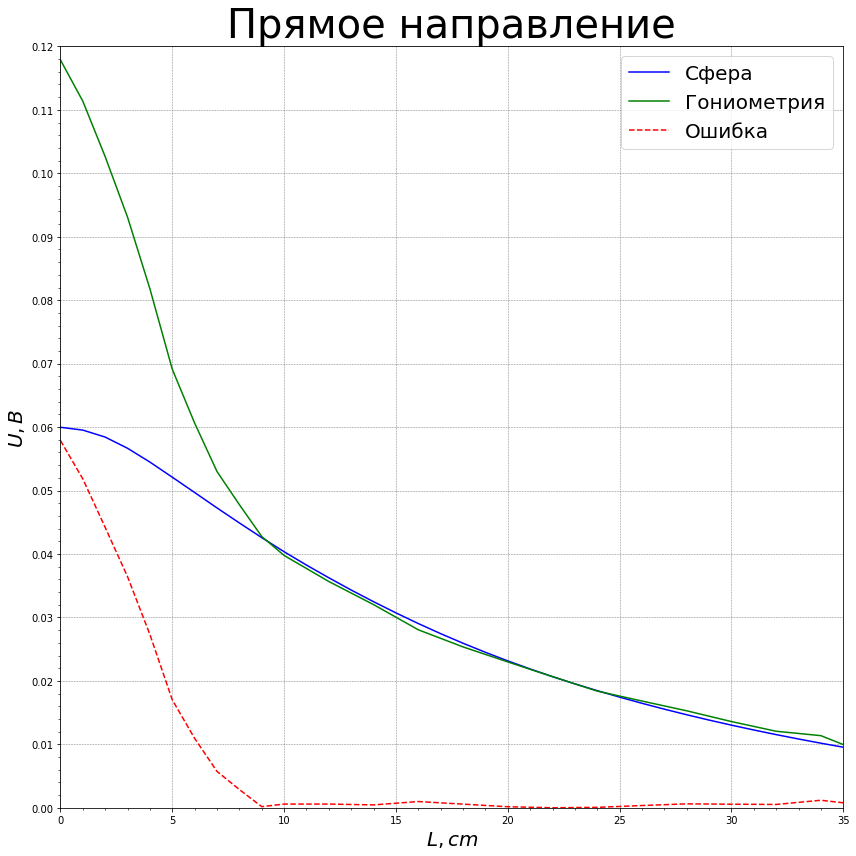

In [116]:
U_res = [x*0.12-0.01 for x in U]
l1 = [x for x in length]

diff = [abs(U_res[i]-means_n[i]) for i in range(10)]
for i in range(0, 15):
    diff.append(abs(U_res[2*i+10]-means_n[i+10]))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)

ax.plot(d, U_res, 'b-', label='Сфера')
ax.plot(l1, means_n, 'g-', label='Гониометрия')
ax.plot(l1[:25], diff, 'r--', label='Ошибка')
ax.set_xlim(xmax=35, xmin=0)
ax.set_ylim(ymax=0.12, ymin=0)
ax.legend(fontsize=20)
ax.grid(linestyle="--", linewidth=0.5, color='gray', zorder=-10)
ax.set_xlabel('$L, cm$', fontsize=20)
ax.set_ylabel('$U, В$', fontsize=20)
ax.set_title('Прямое направление', fontsize=40)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
fig.tight_layout()
fig.savefig('1.png')

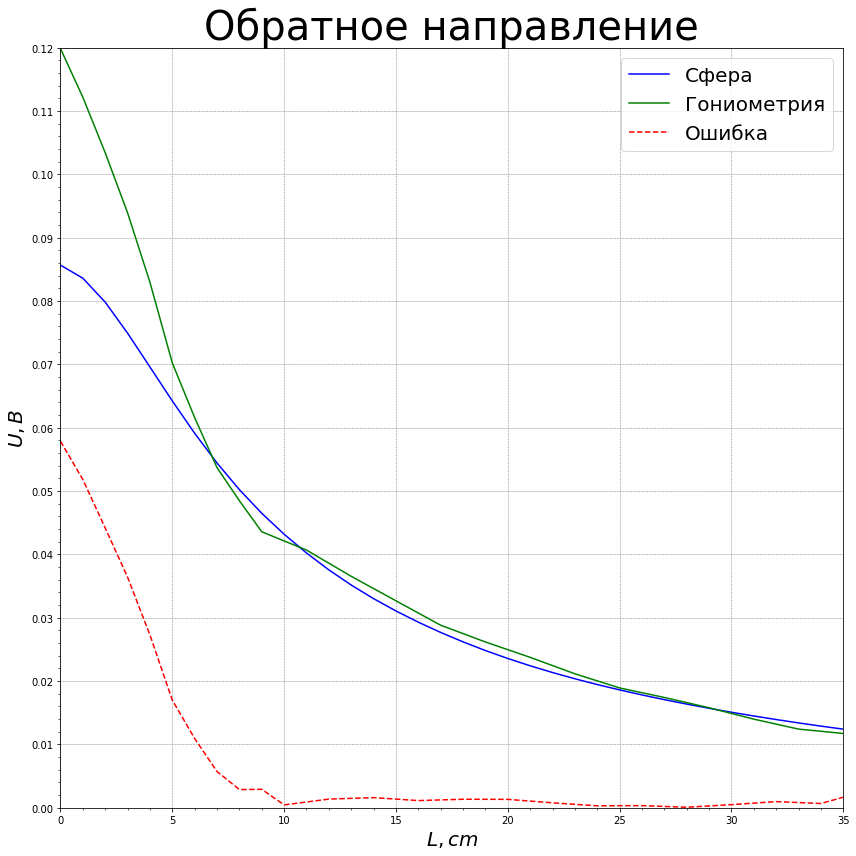

In [124]:
U_bot_res = [x*0.28+0.011 for x in U_bot]
diff2 = [abs(U_res[i]-means_n[i]) for i in range(9)]
for i in range(0, 16):
    diff2.append(abs(U_bot_res[2*i+9]-means_bot[i+9]))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)

ax.plot(d, U_bot_res, 'b-', label='Сфера')
ax.plot(length_bot, means_bot, 'g-', label='Гониометрия')
ax.plot(l1[:25], diff2, 'r--', label='Ошибка')
ax.set_xlim(xmax=35, xmin=0)
ax.set_ylim(ymax=0.12, ymin=0)
ax.legend(fontsize=20)
ax.grid(linestyle="--", linewidth=0.5, color='gray', zorder=-10)
ax.set_xlabel('$L, cm$', fontsize=20)
ax.set_ylabel('$U, В$', fontsize=20)
ax.set_title('Обратное направление', fontsize=40)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.01))
fig.tight_layout()
fig.savefig('2.png')